In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


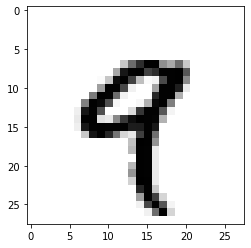

In [4]:
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)


In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=tf.keras.models.Sequential() #a feed forward model
model.add(tf.keras.layers.Flatten()) #takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #a simple fully connected layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [9]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', #how will we calculate the error to minimize the loss
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2705 - accuracy: 0.9208
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1107 - accuracy: 0.9655
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0748 - accuracy: 0.9766
Epoch 4/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0553 - accuracy: 0.9822
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0418 - accuracy: 0.9865
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0333 - accuracy: 0.9888
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0265 - accuracy: 0.9909
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0227 - accuracy: 0.9921
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0177 - accuracy: 0.9939
Epoch 10/10
60

In [10]:
val_loss,val_acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.1080 - accuracy: 0.9746


In [11]:
val_loss

0.10801896140450316

In [12]:
val_acc

0.9746

In [14]:
model.save(r'D:\Hari\Python_fl\H@RI_py_prj\hand_written_digit')

INFO:tensorflow:Assets written to: D:\Hari\Python_fl\H@RI_py_prj\hand_written_digit\assets


In [16]:
new_model=tf.keras.models.load_model(r'D:\Hari\Python_fl\H@RI_py_prj\hand_written_digit')
predictions=new_model.predict(x_test)

In [17]:
predictions[0]

array([7.2969252e-12, 4.6874719e-11, 1.5705093e-09, 1.5240085e-09,
       2.6417126e-16, 2.0851990e-13, 1.3370532e-19, 1.0000000e+00,
       7.7229377e-12, 8.9022562e-10], dtype=float32)

In [18]:
import numpy as np

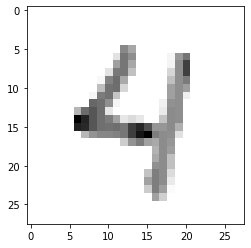

In [43]:
plt.imshow(x_test[27],cmap=plt.cm.binary)
plt.show()

In [48]:
print("output is {}".format(np.argmax(predictions[27])))

output is 4
